# **Bikesharing**

## Business Case Analysis

In [3]:
#Connecting this project to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# importing libraries and loading data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette('colorblind')

data_2020= pd.read_csv('/content/drive/MyDrive/ColabNotebooks/202007-divvy-tripdata.csv')
data_2021 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/202107-divvy-tripdata.csv')
data_2022 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/202207-divvy-tripdata.csv')

In [5]:
# Checking if the df is loaded correctly
data_2021.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual



To determine the required bike inventory for 2023, I'll analyze all the trips taken in July of 2020, 2021, and 2022, considering the starting time of each trip.

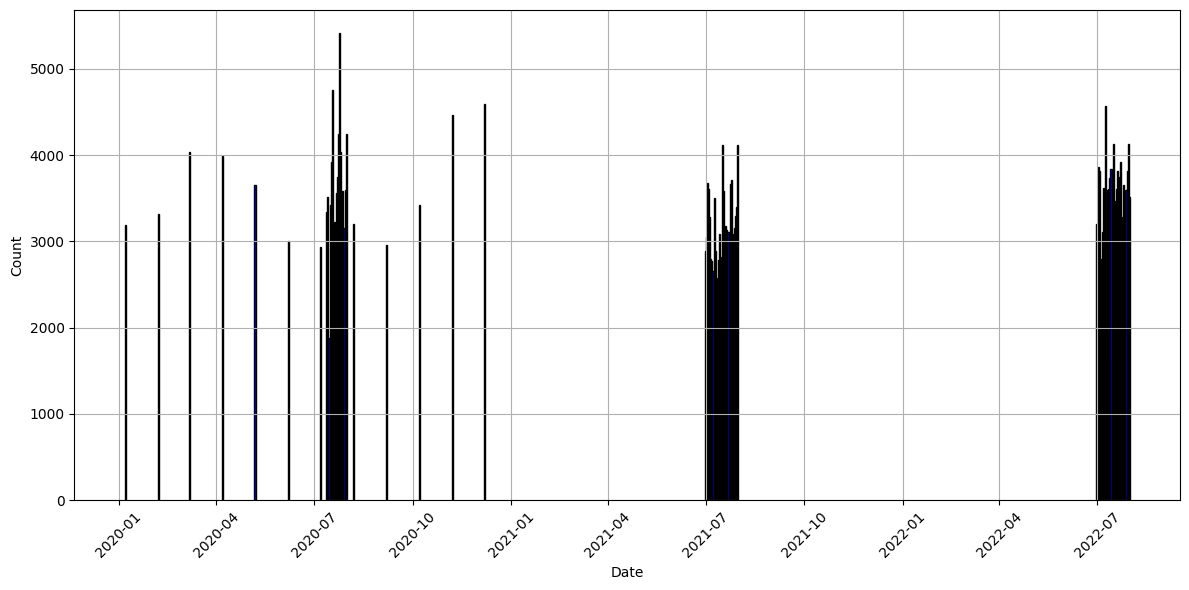

In [7]:
# Convert 'started_at' column to datetime for each dataset
data_2020['started_at'] = pd.to_datetime(data_2020['started_at'])
data_2021['started_at'] = pd.to_datetime(data_2021['started_at'])
data_2022['started_at'] = pd.to_datetime(data_2022['started_at'])

# Group by day and count occurrences for each year
groupby_day_2020 = data_2020.groupby(data_2020['started_at'].dt.date).size().reset_index(name='Count')
groupby_day_2021 = data_2021.groupby(data_2021['started_at'].dt.date).size().reset_index(name='Count')
groupby_day_2022 = data_2022.groupby(data_2022['started_at'].dt.date).size().reset_index(name='Count')

# Combine the results into a single DataFrame
combined_data = pd.concat([groupby_day_2020, groupby_day_2021, groupby_day_2022], ignore_index=True)


# Plot the combined data as a bar plot to see how many bike rides have taken place in the last three years
plt.figure(figsize=(12, 6))
plt.bar(combined_data['started_at'], combined_data['Count'], width=1, color='blue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Although the datasets were expected to exclusively contain data for July 2020, July 2021, and July 2022, the chart suggests the presence of records from other time periods. In light of this observation, I will filter out data that does not pertain to July. However, the current chart fails to provide actionable insights regarding the necessity of purchasing new bikes for 2023.




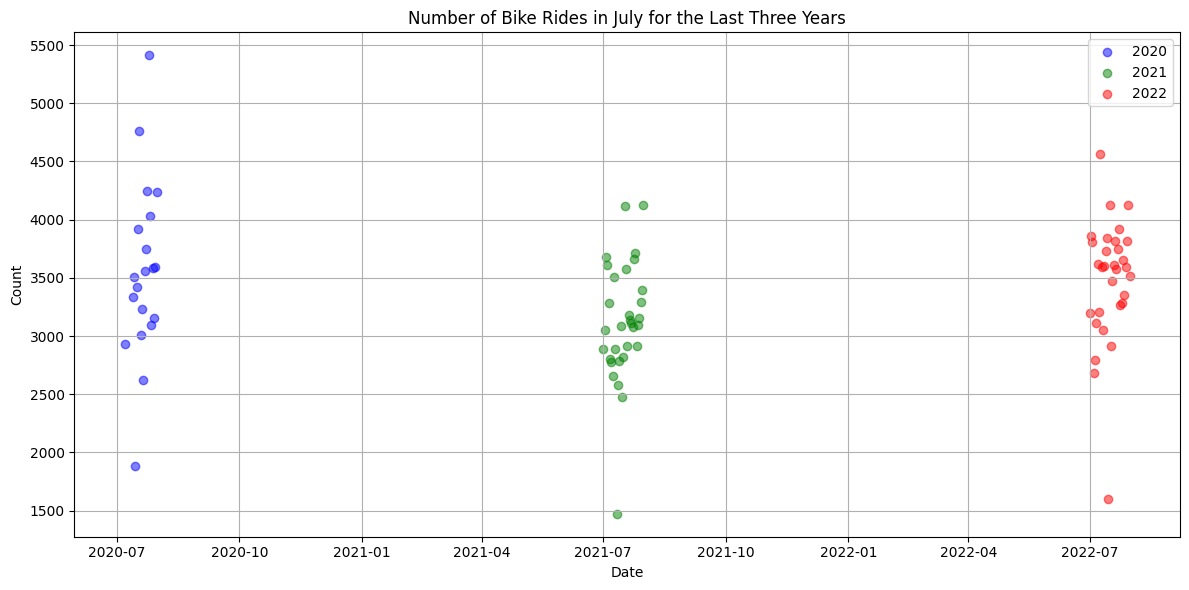

In [21]:
# Filter data for July only
data_2020_july = data_2020[(data_2020['started_at'].dt.month == 7)]
data_2021_july = data_2021[(data_2021['started_at'].dt.month == 7)]
data_2022_july = data_2022[(data_2022['started_at'].dt.month == 7)]

# Count the number of rentals in July for each year
rides_perday_2020 = data_2020_july['started_at'].dt.date.value_counts().reset_index()
rides_perday_2021 = data_2021_july['started_at'].dt.date.value_counts().reset_index()
rides_perday_2022 = data_2022_july['started_at'].dt.date.value_counts().reset_index()

# Rename columns for clarity
rides_perday_2020.columns = ['Date', 'Count_2020']
rides_perday_2021.columns = ['Date', 'Count_2021']
rides_perday_2022.columns = ['Date', 'Count_2022']

# Merge dataframes on the 'Date' column
combined_data_july = rides_perday_2020.merge(rides_perday_2021, on='Date', how='outer')
combined_data_july = combined_data_july.merge(rides_perday_2022, on='Date', how='outer')


# Plot the combined data as a scatter plot to see how many bike rides have taken place in the last three years
plt.figure(figsize=(12, 6))
plt.scatter(combined_data_july['Date'], combined_data_july['Count_2020'],  color='blue', alpha=0.5, label='2020')
plt.scatter(combined_data_july['Date'], combined_data_july['Count_2021'],  color='green', alpha=0.5, label='2021')
plt.scatter(combined_data_july['Date'], combined_data_july['Count_2022'],  color='red', alpha=0.5, label='2022')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Bike Rides in July for the Last Three Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Even after filtering out all records outside of July, the analysis remains inconclusive. Therefore, I'll pivot my approach and focus on working with the aggregated totals instead.



<Figure size 1200x600 with 0 Axes>

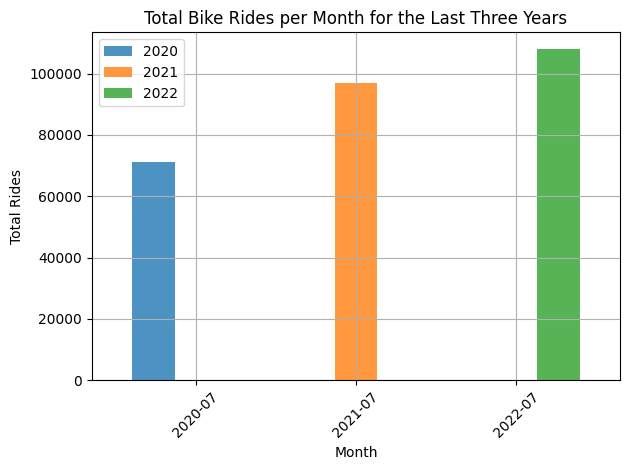

In [28]:
# Convert 'Date' column to datetime objects
combined_data_july['Date'] = pd.to_datetime(combined_data_july['Date'])

# Extract month from the 'Date' column
combined_data_july['Month'] = combined_data_july['Date'].dt.to_period('M')

# Group by month and sum the counts
total_rides_per_month = combined_data_july.groupby('Month')[['Count_2020', 'Count_2021', 'Count_2022']].sum()

# Plot the total rides per month
plt.figure(figsize=(12, 6))
total_rides_per_month.plot(kind='bar', width=0.8, alpha=0.8)

plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.title('Total Bike Rides per Month for the Last Three Years')
plt.legend(['2020', '2021', '2022'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



This observation provides a clear indication that acquiring additional bikes may be warranted. In the subsequent plot, I will delve into the usage patterns of BitBikes, distinguishing between members and non-members across the years.


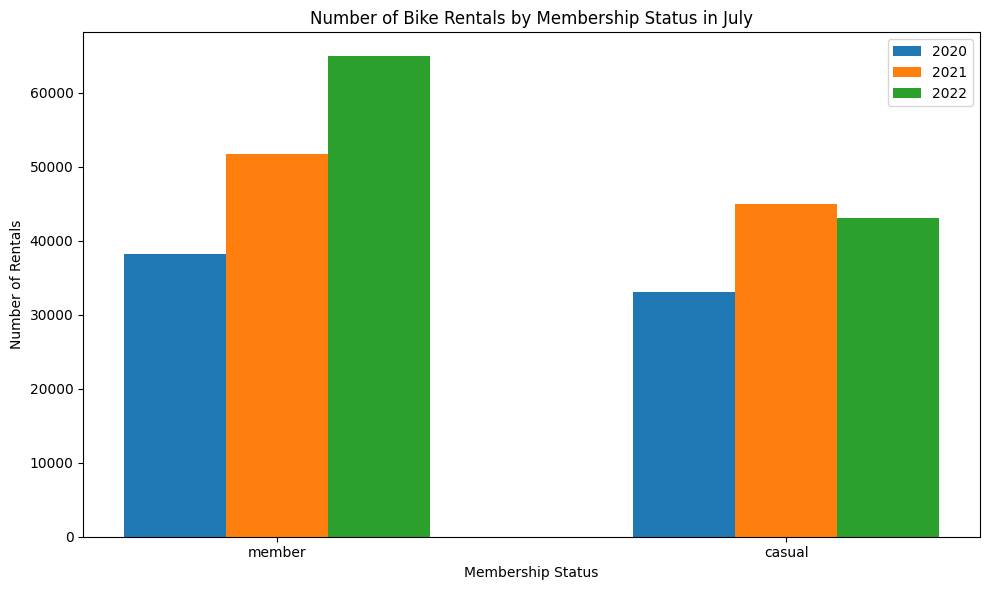

In [8]:
# Filter data for July only
data_2020_july = data_2020[(data_2020['started_at'].dt.month == 7)]
data_2021_july = data_2021[(data_2021['started_at'].dt.month == 7)]
data_2022_july = data_2022[(data_2022['started_at'].dt.month == 7)]

# Count the number of rentals for each membership status in July for each year
membership_counts_2020 = data_2020_july['member_casual'].value_counts()
membership_counts_2021 = data_2021_july['member_casual'].value_counts()
membership_counts_2022 = data_2022_july['member_casual'].value_counts()

# Plotting
labels = ['member', 'casual']
years = ['2020', '2021', '2022']
x = range(len(labels))
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each year
ax.bar([i - width for i in x], membership_counts_2020, width, label=years[0])
ax.bar(x, membership_counts_2021, width, label=years[1])
ax.bar([i + width for i in x], membership_counts_2022, width, label=years[2])

# Add labels, title, and legend
ax.set_xlabel('Membership Status')
ax.set_ylabel('Number of Rentals')
ax.set_title('Number of Bike Rentals by Membership Status in July')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


Finally, we will conclude by examining the various types of bikes that customers have been renting.



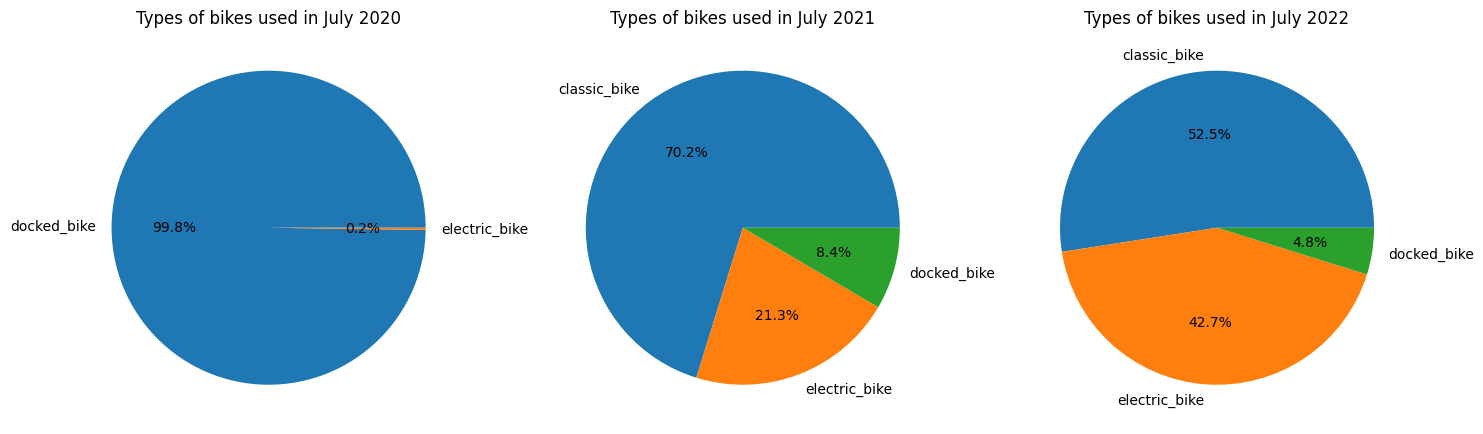

In [20]:
# Exploring the types of bikes used in July thoughout the three years
types_of_bikes2020=data_2020['rideable_type'].value_counts()
types_of_bikes2021=data_2021['rideable_type'].value_counts()
types_of_bikes2022=data_2022['rideable_type'].value_counts()

labels = ['docked_bike', 'electric_bike', 'classic bike']

# Plotting the three years
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(types_of_bikes2020, labels=types_of_bikes2020.index, autopct='%1.1f%%')
axs[0].set_title('Types of bikes used in July 2020')
axs[1].pie(types_of_bikes2021, labels=types_of_bikes2021.index, autopct='%1.1f%%')
axs[1].set_title('Types of bikes used in July 2021')
axs[2].pie(types_of_bikes2022, labels=types_of_bikes2022.index, autopct='%1.1f%%')
axs[2].set_title('Types of bikes used in July 2022')


# Ensure the layout is tight
plt.tight_layout()

# Show the plot
plt.show()


I opted for pie charts to illustrate the different types of bikes rented by customers. With few categories, pie charts effectively showcase the evolving preferences, notably the surging popularity of electric bikes in the last two years alongside the declining interest in docked bikes. Drawing from these insights, I recommend the company invest in more electric bikes for 2023.